<a href="https://colab.research.google.com/github/Jos21os/Bank_Marketing_Project_Audience_Segmentation/blob/Python/Bank_Marketing_Project_Audience_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Marketing Project: Audience Segmentation

## Introduction

Audience segmentation to apply best practices of digital marketing strategies in the banking sector.

The project is based on a database of a Digital Marketing department of a Bank in Portugal.

In this project was carried out:

Data Preparation

Exploratory Data Analysis

## Data Preparation


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import files
uploaded = files.upload()


Saving bank-additional-full.csv to bank-additional-full.csv


In [5]:
df = pd.read_csv('/content/bank-additional-full.csv', sep = ';')


## Understand Data

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df.describe(include ='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


## Data Cleaning

### Missing Values

There are 3 types of missing values within the database. They are replaced with the following definitions.

unknown = pd.NA

nonexistent = pd.NA

999 = np.nan

In [ ]:
df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']] = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']].replace('unknown', pd.NA)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df[['poutcome']] = df[['poutcome']].replace('nonexistent', pd.NA)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        5625 non-null   object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df[['pdays']] = df[['pdays']].replace(999, np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           1515 non-null   float64
 13  previous        41188 non-null  int64  
 14  poutcome        5625 non-null   object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df[['default', 'housing', 'loan', 'y']] = df[['default', 'housing', 'loan', 'y']].replace('yes', True)
df[['default', 'housing', 'loan', 'y']] = df[['default', 'housing', 'loan', 'y']].replace('no', False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           1515 non-null   float64
 13  previous        41188 non-null  int64  
 14  poutcome        5625 non-null   object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

<ipython-input-26-f0b700bd4c64>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['default', 'housing', 'loan', 'y']] = df[['default', 'housing', 'loan', 'y']].replace('no', False)


<Axes: >

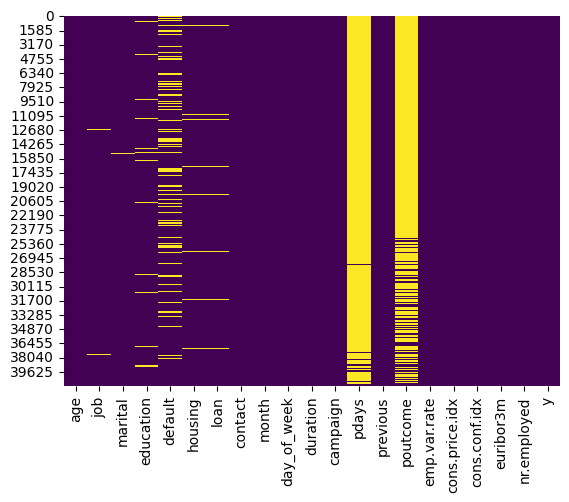

In [ ]:
# Map of missing values (yellow = missing)

sns.heatmap(df.isnull(), cbar=False, cmap="viridis")

### Remove Duplicates

In [ ]:
df[df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,False,False,False,telephone,may,thu,...,1,NaN,0,<NA>,1.1,93.994,-36.4,4.855,5191.0,False
12261,36,retired,married,<NA>,False,False,False,telephone,jul,thu,...,1,NaN,0,<NA>,1.4,93.918,-42.7,4.966,5228.1,False
14234,27,technician,single,professional.course,False,False,False,cellular,jul,mon,...,2,NaN,0,<NA>,1.4,93.918,-42.7,4.962,5228.1,False
16956,47,technician,divorced,high.school,False,True,False,cellular,jul,thu,...,3,NaN,0,<NA>,1.4,93.918,-42.7,4.962,5228.1,False
18465,32,technician,single,professional.course,False,True,False,cellular,jul,thu,...,1,NaN,0,<NA>,1.4,93.918,-42.7,4.968,5228.1,False
20216,55,services,married,high.school,<NA>,False,False,cellular,aug,mon,...,1,NaN,0,<NA>,1.4,93.444,-36.1,4.965,5228.1,False
20534,41,technician,married,professional.course,False,True,False,cellular,aug,tue,...,1,NaN,0,<NA>,1.4,93.444,-36.1,4.966,5228.1,False
25217,39,admin.,married,university.degree,False,False,False,cellular,nov,tue,...,2,NaN,0,<NA>,-0.1,93.200,-42.0,4.153,5195.8,False
28477,24,services,single,high.school,False,True,False,cellular,apr,tue,...,1,NaN,0,<NA>,-1.8,93.075,-47.1,1.423,5099.1,False
32516,35,admin.,married,university.degree,False,True,False,cellular,may,fri,...,4,NaN,0,<NA>,-1.8,92.893,-46.2,1.313,5099.1,False


In [ ]:
df.drop_duplicates(inplace = True)
df.duplicated().value_counts()

,count
False,41176


### Correct Data Type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             40846 non-null  object 
 2   marital         41096 non-null  object 
 3   education       39446 non-null  object 
 4   default         32580 non-null  object 
 5   housing         40186 non-null  object 
 6   loan            40186 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           1515 non-null   float64
 13  previous        41176 non-null  int64  
 14  poutcome        5625 non-null   object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [ ]:
df[['default', 'housing', 'loan', 'y']] = df[['default', 'housing', 'loan', 'y']].astype('boolean')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             40846 non-null  object 
 2   marital         41096 non-null  object 
 3   education       39446 non-null  object 
 4   default         32580 non-null  boolean
 5   housing         40186 non-null  boolean
 6   loan            40186 non-null  boolean
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           1515 non-null   float64
 13  previous        41176 non-null  int64  
 14  poutcome        5625 non-null   object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

## Univariate analysis

### Age

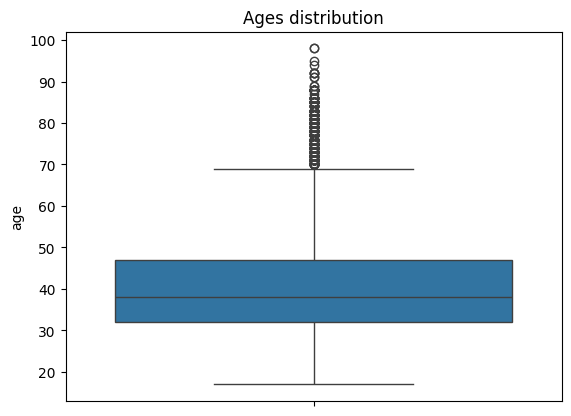

In [ ]:
sns.boxplot(data = df['age'])

plt.title('Ages distribution')
plt.show()

### Job

Text(0.5, 1.0, 'Distribution of jobs')

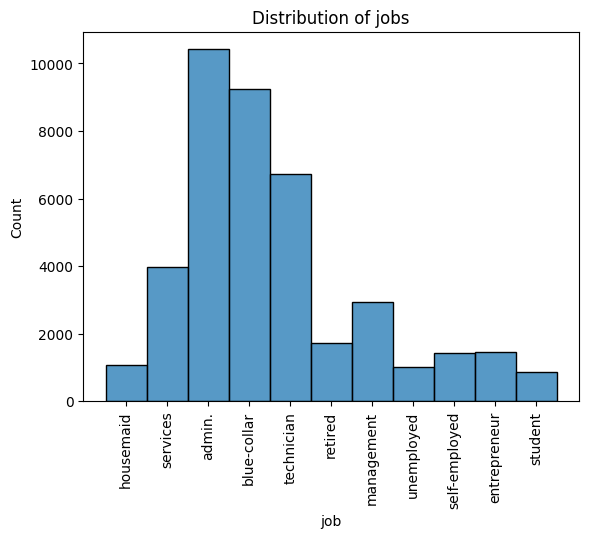

In [ ]:
sns.histplot(data = df['job'])

plt.xticks(rotation=90)
plt.title('Distribution of jobs')

### Marital

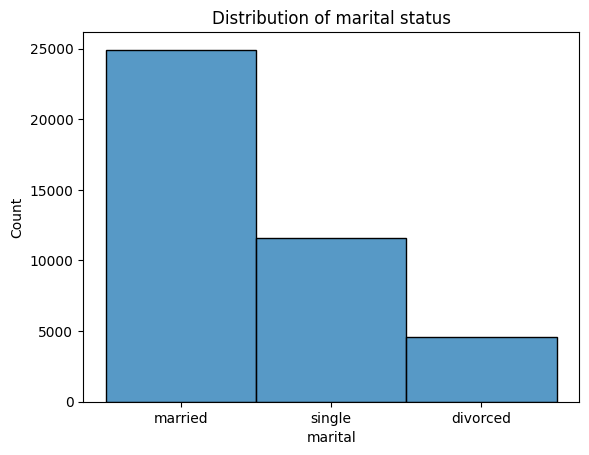

In [ ]:
sns.histplot(data = df['marital'])

plt.title('Distribution of marital status')
plt.show()

### Education

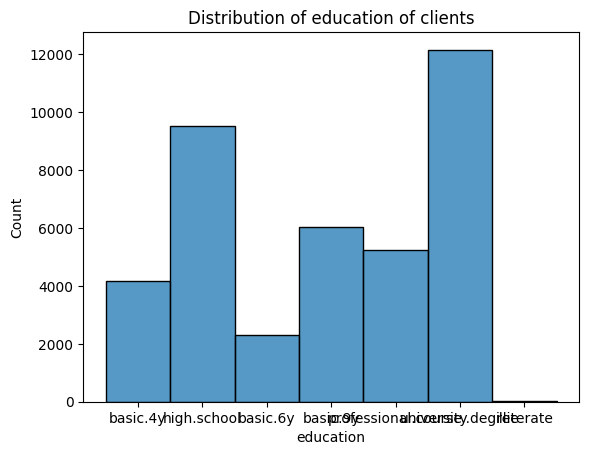

In [ ]:
sns.histplot(data = df['education'])

plt.title('Distribution of education of clients')
plt.show()

### Housing

<ipython-input-46-f94e910da662>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='housing_labels', data=df, palette='Blues', edgecolor='black')


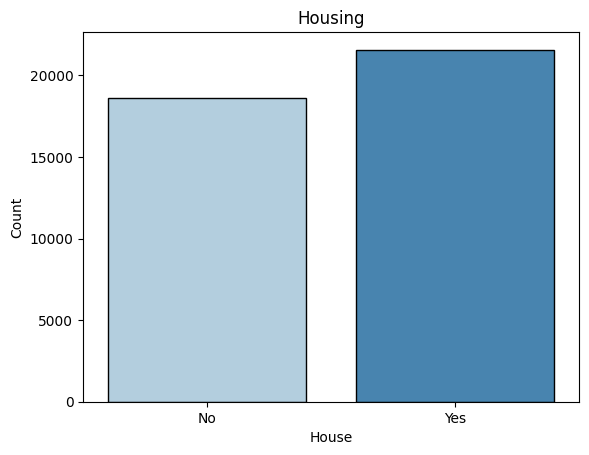

In [ ]:
df['housing_labels'] = df['housing'].map({True: 'Yes', False: 'No'})
sns.countplot(x='housing_labels', data=df, palette='Blues', edgecolor='black')
plt.title('Housing')
plt.xlabel('House')
plt.ylabel('Count')
plt.show()

plt.show()

### Contact

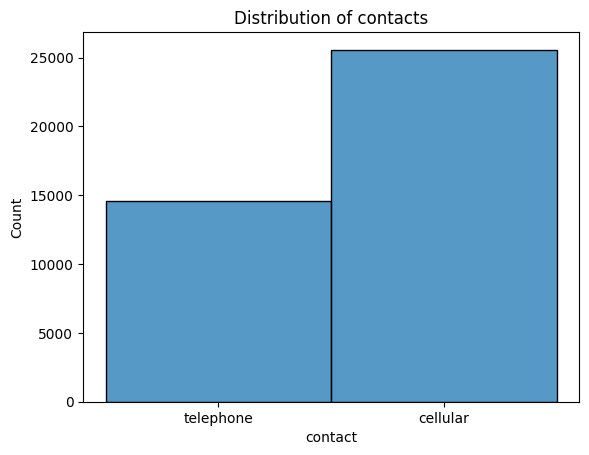

In [ ]:
sns.histplot(data=df['contact'])
plt.title('Distribution of contacts')
plt.show()

### Month

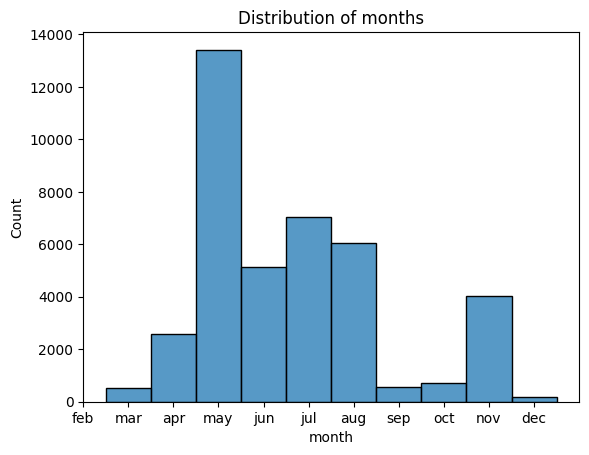

In [ ]:
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

sns.histplot(data=df['month'])

plt.title('Distribution of months')
plt.show()

### Days of Week

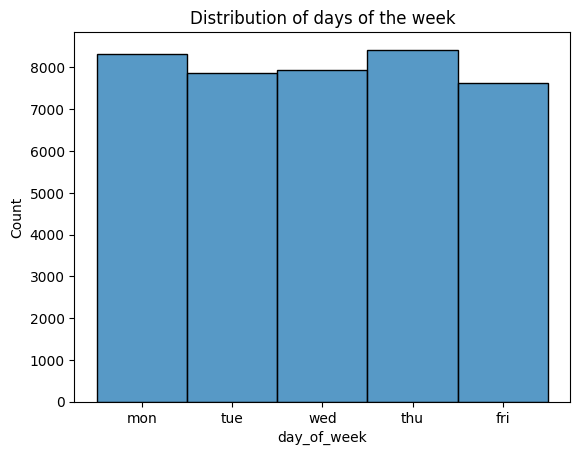

In [ ]:
day_order = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']

df['day of week'] = pd.Categorical(df['day_of_week'], categories=day_order, ordered=True)

sns.histplot(data=df['day_of_week'])

plt.title('Distribution of days of the week')
plt.show()

### Duration

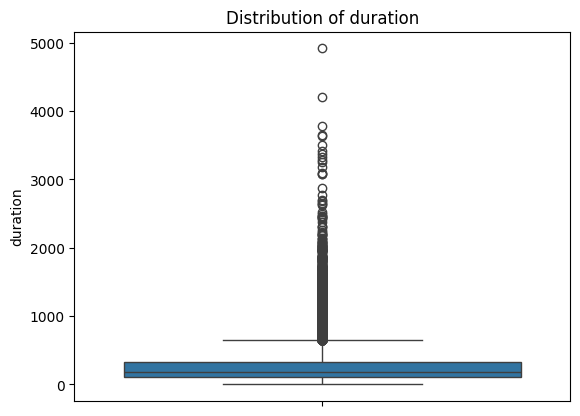

In [ ]:
sns.boxplot(data=df['duration'])
plt.title('Distribution of duration')
plt.show()

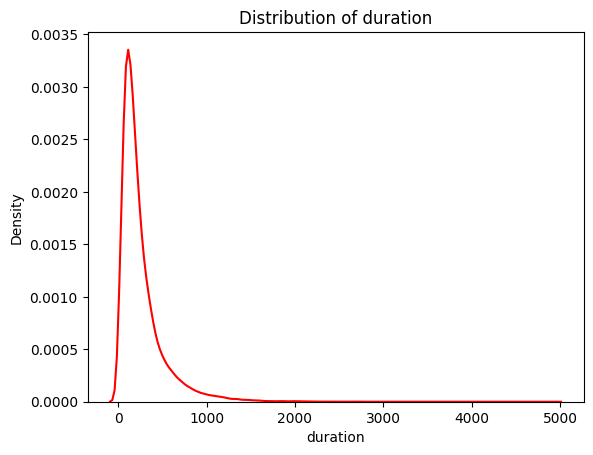

In [ ]:
sns.kdeplot(data=df['duration'], color='red')

plt.title('Distribution of duration')
plt.show()

### Campaign

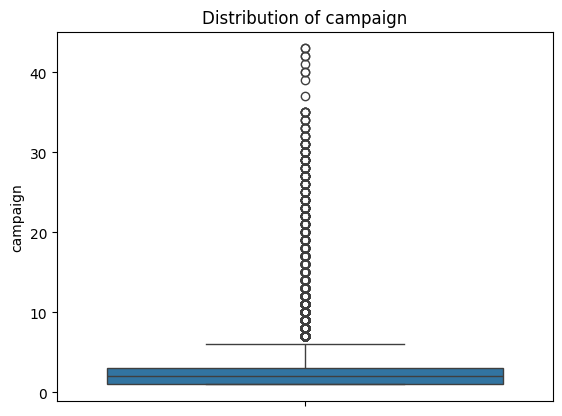

In [ ]:
sns.boxplot(data=df['campaign'])
plt.title('Distribution of campaign')
plt.show()

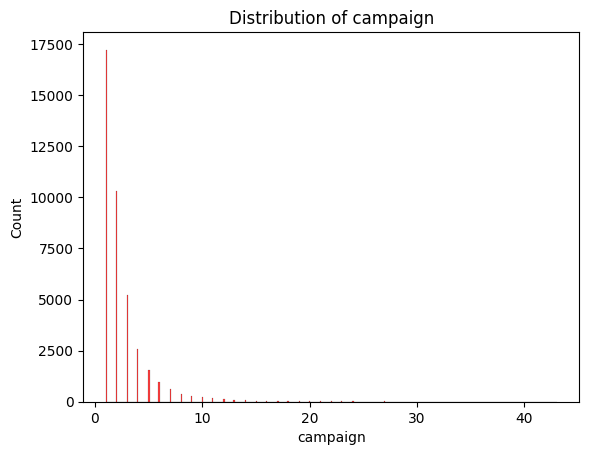

In [ ]:
sns.histplot(data=df['campaign'], color='red')
plt.title('Distribution of campaign')
plt.show()

### P-Days

<Axes: xlabel='pdays', ylabel='Density'>

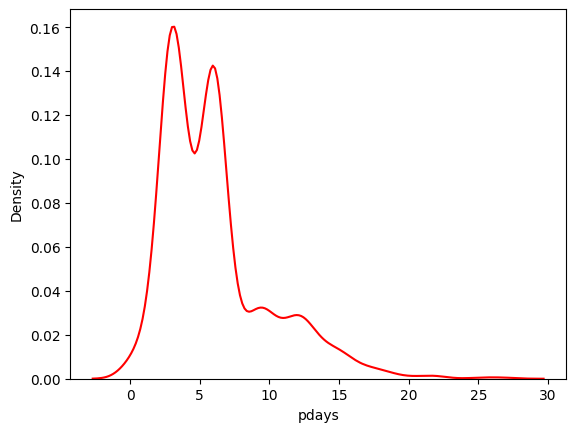

In [ ]:
sns.kdeplot(df.pdays, color = 'red')

### Previous

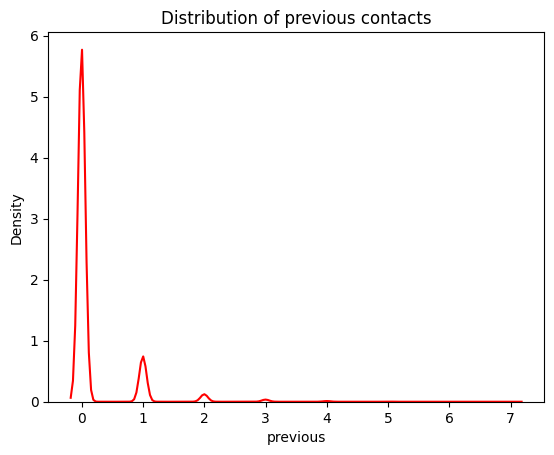

In [ ]:
sns.kdeplot(df.previous, color='red')

plt.title('Distribution of previous contacts')
plt.show()

### Poutcome

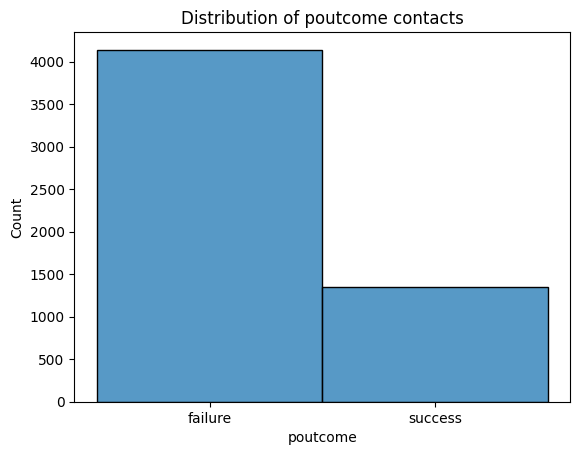

In [ ]:
sns.histplot(df.poutcome)

plt.title('Distribution of poutcome contacts')
plt.show()

### Emp.Varr.Rate

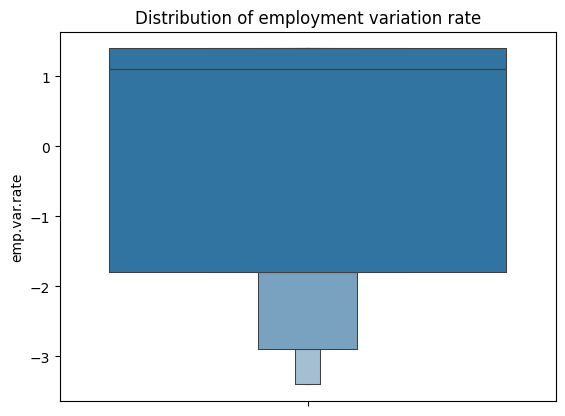

In [ ]:
sns.boxenplot(df['emp.var.rate'])
plt.title('Distribution of employment variation rate')
plt.show()

### Cons.price.idx

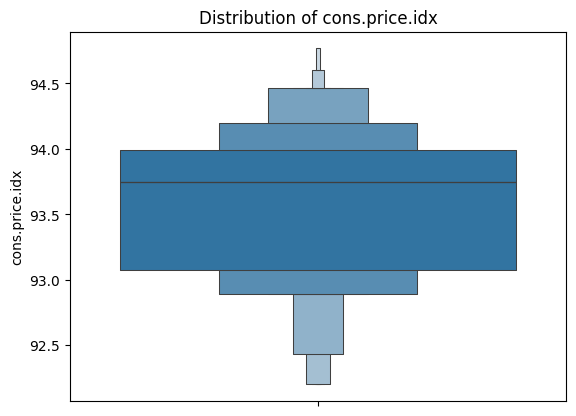

In [ ]:
sns.boxenplot(df['cons.price.idx'])

plt.title('Distribution of cons.price.idx')
plt.show()

### Cons. Conf.IDX

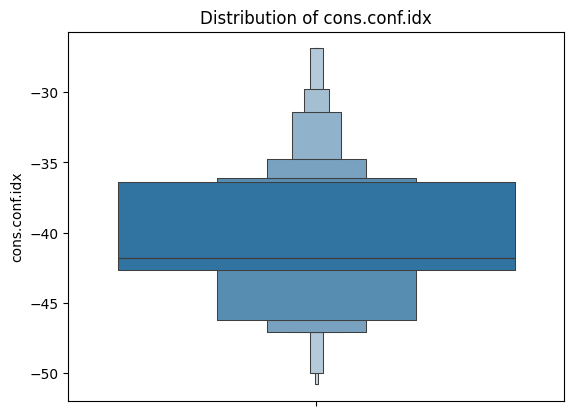

In [ ]:
sns.boxenplot(df['cons.conf.idx'])

plt.title('Distribution of cons.conf.idx')
plt.show()

### Euribor

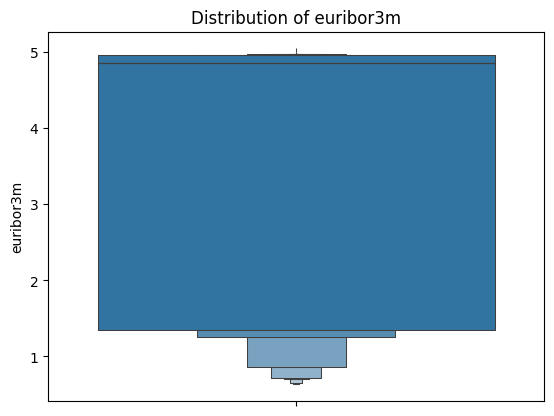

In [ ]:
sns.boxenplot(df['euribor3m'])

plt.title('Distribution of euribor3m')
plt.show()

### Nr.Employed

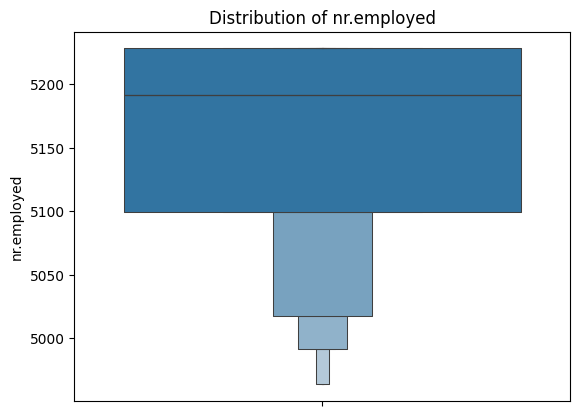

In [ ]:
sns.boxenplot(df['nr.employed'])
plt.title('Distribution of nr.employed')
plt.show()

## Exploratory Data Analysis (EDA)

Text(40, 8200, '<-- Mean')

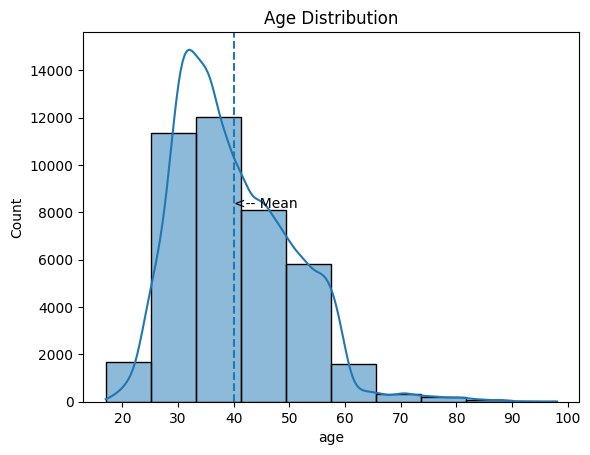

In [6]:
sns.histplot(df['age'],kde=True,bins=10)
plt.title("Age Distribution")
plt.axvline(df['age'].mean(),ls='--')
plt.text(40,8200,'<-- Mean')

Text(210, 6500, '<-- Mean')

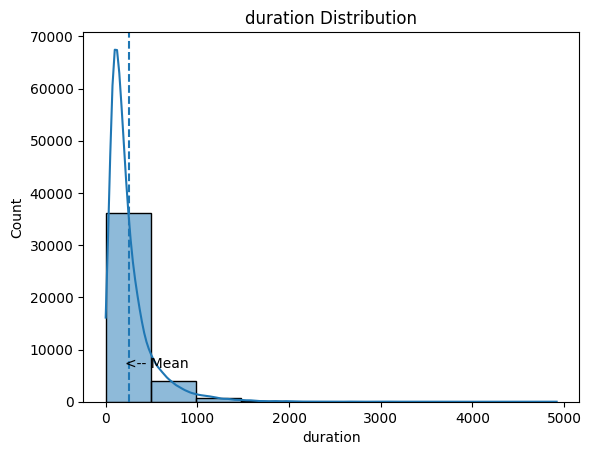

In [7]:
sns.histplot(df['duration'],kde=True,bins=10)
plt.title("duration Distribution")
plt.axvline(df['duration'].mean(),ls='--')
plt.text(210,6500,'<-- Mean')

Text(0.5, 1.0, 'jobs Distribution')

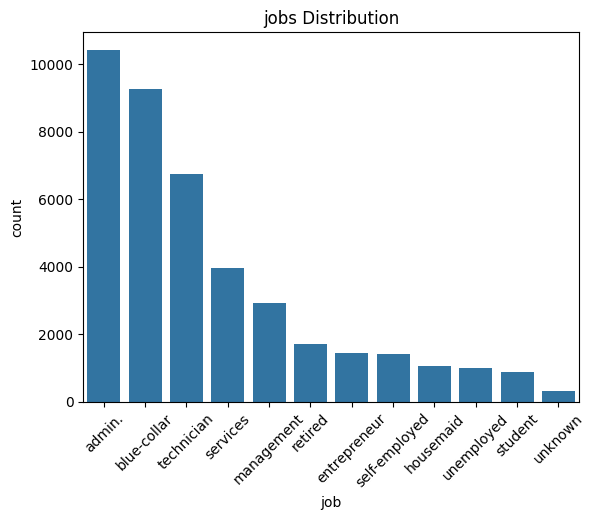

In [8]:
sns.countplot(data=df,x='job',order = df['job'].value_counts().index)
plt.xticks(rotation = 45)
plt.title("jobs Distribution")

Text(0.5, 1.0, 'most call months')

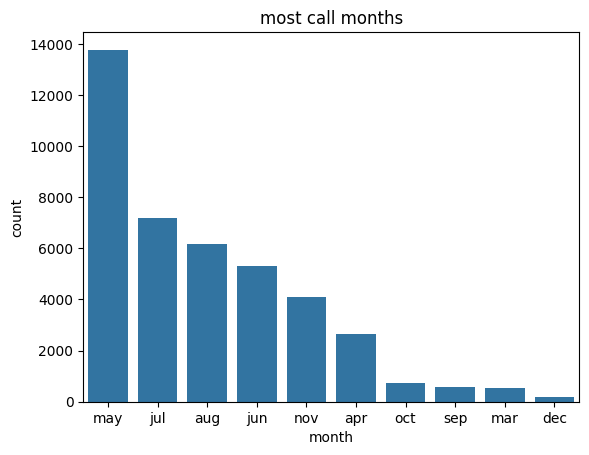

In [9]:
sns.countplot(x='month', data=df, order=df['month'].value_counts().index)
plt.title("most call months")

Text(0.5, 1.0, 'calls per day')

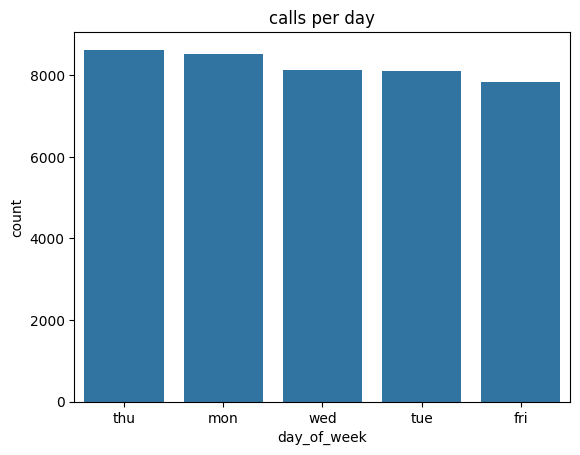

In [10]:
sns.countplot(x='day_of_week', data=df, order=df['day_of_week'].value_counts().index)
plt.title("calls per day")

<Axes: xlabel='y', ylabel='count'>

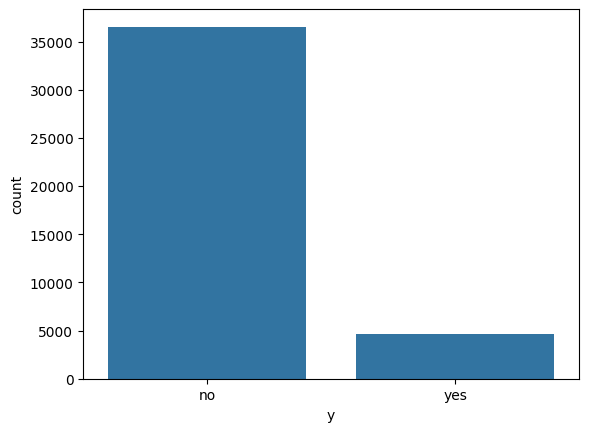

In [11]:
sns.countplot(x='y', data=df, order=df['y'].value_counts().index)